Epoch 1/10
47/47 [==============================] - 3s 29ms/step - loss: 2.1496 - acc: 0.2906 - val_loss: 1.6874 - val_acc: 0.4955
Epoch 2/10
47/47 [==============================] - 1s 15ms/step - loss: 1.5058 - acc: 0.6292 - val_loss: 1.3179 - val_acc: 0.6077
Epoch 3/10
47/47 [==============================] - 1s 14ms/step - loss: 1.0810 - acc: 0.7729 - val_loss: 1.0373 - val_acc: 0.7118
Epoch 4/10
47/47 [==============================] - 1s 13ms/step - loss: 0.8961 - acc: 0.7787 - val_loss: 0.9519 - val_acc: 0.7148
Epoch 5/10
47/47 [==============================] - 1s 14ms/step - loss: 0.7869 - acc: 0.8216 - val_loss: 0.8767 - val_acc: 0.7535
Epoch 6/10
47/47 [==============================] - 1s 14ms/step - loss: 0.7122 - acc: 0.8332 - val_loss: 0.7746 - val_acc: 0.7810
Epoch 7/10
47/47 [==============================] - 1s 15ms/step - loss: 0.6301 - acc: 0.8585 - val_loss: 0.7474 - val_acc: 0.7828
Epoch 8/10
47/47 [==============================] - 1s 14ms/step - loss: 0.5927 - a

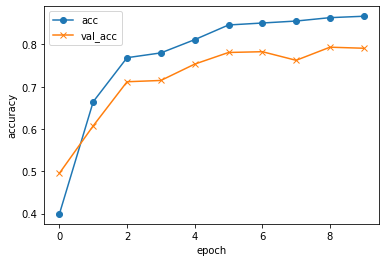

evaluate loss: 0.7271382808685303
evaluate acc: 0.7910000085830688


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:1500]
X_test = X_test.reshape(X_test.shape[0], 784)[:6000]
y_train = to_categorical(y_train)[:1500]
y_test = to_categorical(y_test)[:6000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
# 여기서는 dropout 사용 X
# model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["acc"])

def funA():
    global epochs
    epochs = 5

def funB():
    global epochs
    epochs = 10
    
def funC():
    global epochs
    epochs = 60
    
#funA()
funB()
# funcC()

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

#acc와 val_acc 플롯
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))